# Importing the Required Libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### above dataset has 13 columns.
### customerid is the unique.

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [110]:
df.duplicated('CustomerId').sum()

0

In [111]:
df = df.set_index('CustomerId')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# Encoding

In [113]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [114]:
df.replace({'Geography': {'France': 2, 'Germany': 1, 'Spain': 0}}, inplace=True)

In [115]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [116]:
df.replace({'Gender': {'Male': 0, 'Female': 1}}, inplace=True)

In [117]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [118]:
df.replace({'Num Of Products': {1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [119]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [120]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [121]:
df.loc[(df['Balance'] == 0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [122]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<AxesSubplot:>

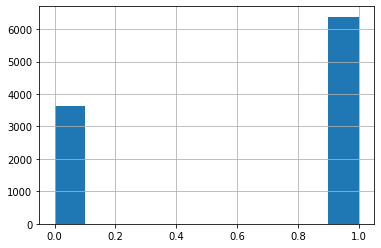

In [123]:
df['Zero Balance'].hist()

In [124]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# Define Labels and Features

In [125]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [126]:
X = df.drop(['Surname','Churn'], axis=1)

In [127]:
y = df['Churn']

In [128]:
X.shape, y.shape

((10000, 11), (10000,))

In [129]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

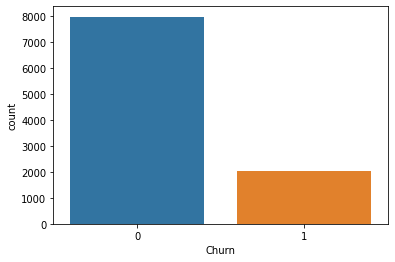

In [130]:
sns.countplot(x = 'Churn', data= df)

In [131]:
X.shape, y.shape

((10000, 11), (10000,))

# Random Under Sampling

In [132]:
from imblearn.under_sampling import RandomUnderSampler

In [133]:
rus = RandomUnderSampler(random_state=2529)

In [134]:
X_rus, y_rus = rus.fit_resample(X, y)

In [135]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [136]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [137]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

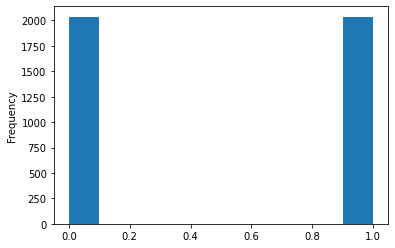

In [138]:
y_rus.plot(kind =  'hist')

# Random OverSampling

In [139]:
from imblearn.over_sampling import RandomOverSampler


In [140]:
ros = RandomOverSampler(random_state=2529)

In [141]:
X_ros, y_ros = ros.fit_resample(X, y)

In [142]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [143]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [144]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

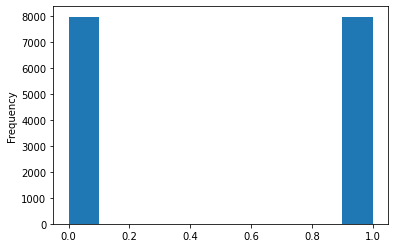

In [145]:
y_ros.plot(kind = 'hist')

# Train Test Split

In [146]:
from sklearn.model_selection import train_test_split

## Splitting Original Data

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

## Splitting Random Under Sample Data

In [148]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=25)

## Splitting Random Over Sample Data

In [149]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=25)

In [150]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## Standarizing the Original Data

In [151]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [152]:
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

## Standardizing Random Under Sample Data

In [153]:
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [154]:
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

## Standardizing Random Over Sample Data

In [155]:
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [156]:
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

# Support Vector Machine

In [157]:
from sklearn.svm import SVC

In [158]:
svc = SVC()

In [159]:
svc.fit(X_train, y_train)

SVC()

In [160]:
y_pred = svc.predict(X_test)

# Model Accuracy

In [161]:
from sklearn.metrics import confusion_matrix, classification_report

In [162]:
confusion_matrix(y_test, y_pred)

array([[2374,   45],
       [ 421,  160]], dtype=int64)

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



# Hyperparameter Tunning

In [164]:
from sklearn.model_selection import GridSearchCV

In [165]:
param_grid = {'C': [0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']}

In [166]:
grid = GridSearchCV(SVC(), param_grid, refit=True,verbose=2, cv=2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [167]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [168]:
grid_predictions = grid.predict(X_test)

In [169]:
confusion_matrix(y_test, grid_predictions)

array([[2166,  253],
       [ 365,  216]], dtype=int64)

In [170]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2419
           1       0.46      0.37      0.41       581

    accuracy                           0.79      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.78      0.79      0.79      3000



# Model with Random Under Sampling

In [171]:
svc_rus = SVC()

In [172]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [173]:
y_pred_rus = svc_rus.predict(X_test_rus)

# Model Accuracy

In [174]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[483, 120],
       [172, 448]], dtype=int64)

In [175]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       603
           1       0.79      0.72      0.75       620

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



# Hyperparameter Tunning

In [176]:
param_grid = {'C': [0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']}

In [177]:
grid_rus = GridSearchCV(SVC(), param_grid, refit=True,verbose=2, cv=2)
grid_rus.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [178]:
print(grid_rus.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.01)


In [179]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [180]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[456, 147],
       [161, 459]], dtype=int64)

In [181]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       603
           1       0.76      0.74      0.75       620

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223



# Model With Random Over Sampling

In [182]:
svc_ros = SVC()

In [183]:
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

In [184]:
y_pred_ros = svc_ros.predict(X_test_ros)

# Model Accuracy

In [185]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1854,  572],
       [ 551, 1801]], dtype=int64)

In [186]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2426
           1       0.76      0.77      0.76      2352

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.77      0.76      0.76      4778



# Hyperparameter Tunning

In [187]:
param_grid = {'C': [0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']}

In [188]:
grid_ros = GridSearchCV(SVC(), param_grid, refit=True,verbose=2, cv=2)
grid_ros.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.7s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   9.4s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [189]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [190]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [191]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2064,  362],
       [  75, 2277]], dtype=int64)

In [193]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2426
           1       0.86      0.97      0.91      2352

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778

